<a href="https://colab.research.google.com/github/fblondiaux/LGBIO2072-2020/blob/TP2Antoine/LGBIO2072_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - Firing Rate
__Authors:__ Antoine de Comite and Florence Blondiaux

__Content inspired from__: Neuromatch Academy github.com/NeuromatchAcademy

Please run the cells below to initialize the notebook

In [1]:
#@title Useful libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rand_syn(t,sigma = 0.1, imean = 25e-11):
    dt = t[1]-t[0]
    return imean * (1 + 0.1 * (np.sqrt(np.max(t)/dt)) * np.random.normal(0,sigma,len(t)))

def step_current(t,sigma = 0.1, imean = 25e-11):
    """
    Returns a step current, with step mean =  25e-11
    """
    i = np.zeros_like(t)
    i[int(len(t)/2):] = 1 #step
    i = i+np.random.normal(0,sigma,len(t)) 
    return imean * i

def LIF(input_current,t,  tau= 20e-3 , urest= -60e-3 , r= 100e6, ureset = -70e-3 \
               ,theta = -50e-3, t_ref = 10e-3 ): 
    """
    Authors : Antoine de Comite and Florence Blondiaux
    Simulate the LIF model in response to an external input current
    Args:
      input_current   : Vector containing the input current [A].
      t               : Vector containing the discretized time points [s]
      tau             : Membrane time constant. Default value: 20e-3 [s]
      urest           : Leak potential. Default value: -60e-3 [V]
      r               : Leak resistance. Default value: 100e6 [Ohm]
      ureset          : Reset potential. Default value: -70e-3[V]
      theta           : Firing threashold. Default value: -50e-3 [V]
      t_ref           : Refractory period. Default value: 10e-3 [S]
    Returns:
      u               : membrane potential [V]
      ts              : spike times [s]
    """
    u = np.zeros_like(input_current)
    ts = []
    dt = t[1]-t[0]
    S = np.zeros_like(input_current)
    u[0]=urest
    t_wait = 0
    for step in range(0,len(input_current)-1):
        if u[step] > theta:
            u[step]= theta / 1.2
            u[step+1] = ureset
            t_wait = t_ref/dt
            ts.append((step+1)*dt)
        elif t_wait >0:
            u[step +1] = ureset
            t_wait -=1
        else:
            u[step+1]=u[step] -dt/tau * (u[step]-urest) + r*dt/tau * input_current[step]
    return u, ts

def load_dataset():
  url = 'https://raw.githubusercontent.com/fblondiaux/LGBIO2072-2020/master/ExtraContent/Output_Current.csv'
  df = pd.read_csv(url, error_bad_lines=False)
  S = df.to_numpy()
  return S, 1e-3
def plot_data(S):
  for i in range(len(S)):
    spike_times = S[i]
    plt.scatter(np.where(S[i,:]==1),i*np.ones_like(np.where(S[i,:]==1)),facecolor='skyblue',edgecolor = "white")
    plt.xlabel('Time [mS]')
    plt.ylabel('Neuron')
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()


In [2]:
import ipywidgets as widgtest #interactive display
%config InlineBackend.figure_format = 'retina'
#use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

---

# Tutorials Objectives

In the last tutorial, we implemented the LIF model of the neuron in which we modelled train of spikes from continuous input current. In this tutorial we will characterise and study these spike trains and discuss the messages they convey. 


---
# Reminders
## 1. Raster plot

A *raster plot* can be used to represent spike trains from multiple neurons (or from a single neuron modelled several times) by plotting dots at spike times `i` from neuron `j` at plot height `j` It can be useful to visualise the activity of several neurons at the same time. For example if we want to represent the spike times contained in `spike_time`, we can use :
```
plt.scatter(spike_times, j*np.ones_like(spike_times))
```

![spikes plot](https://github.com/mpbrigham/colaboratory-figures/raw/master/nma/python-for-nma/spikes_plot.png)

## 2. Firing rate 

Spikes alone are not very informative. However, looking closer at the spikes train can be very informative for example while focussing at firing rate and spiking regularities.

The firing rate can be computed by convoluting a given kernel with the spike trains. Let $f_{ij=1}^{n}$ be the firing times and $S(t):=\sum_i \delta(t-t_i)$ be the spike train. The firing rate $\rho(t)$ can be computed as the convolution of the spike train $S(t)$ with a given kernel $\kappa(t)$ : 

$$
\begin{eqnarray}
\rho(t) & =& \kappa(t) * S(t) = \int_{-\infty}^{\infty} \kappa(t)S(t-s)ds
\end{eqnarray}
$$

The shape of the kernel will therefore be determining in the values of the instantaneous firing rate. 



---
# Exercises

## Exercise 1 

Model the responses of 500 neurons to a random input current and create the corresponding raster plot.

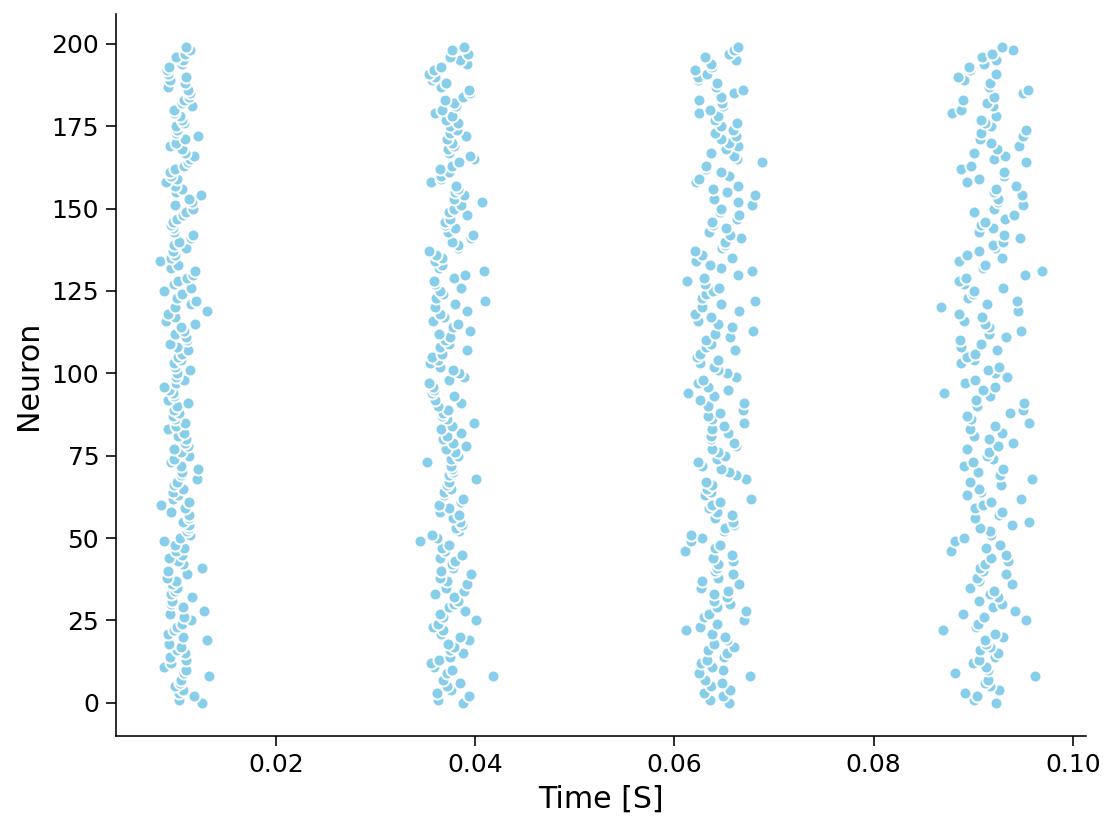

In [4]:
def make_raster_plot(N,t_range,sigma=0.1):
    """
    Computes the answer of N neurons to a random synaptic input current and plot the results as a raster plot
    
    Inputs : 
        N : Number of neurons
        t_range : Time-domain on which we want to investigate the neurons' responses
        sigma: Standard deviation of the noise of the input current 
    Outputs : 
        none
    """

    # Compute the responses of the neurons using the LIF function

    ######################
    ### your code here ###
    ######################


    dt = t_range[1]-t_range[0]
    neurons= {}
    for i in range(N):
        input_current = rand_syn(t_range,sigma)
        u,neurons[i] = LIF(input_current, t_range)
    # Represent these responses on a scatter plot

    ######################
    ### your code here ###
    ######################

    
    for i in range(N):
        spike_times = neurons[i]
        plt.scatter(spike_times, i*np.ones_like(spike_times),facecolor='skyblue',edgecolor = "white")
    plt.xlabel('Time [S]')
    plt.ylabel('Neuron')
    plt.show()
        
# Run the lines below to test your code


t_max = 100e-3   # second
dt = .1e-3        # second
t_range = np.arange(0,t_max,dt)
make_raster_plot(200,t_range,sigma=0.2)

**Investigate** the effect of the variance of the input current on the spike train regularities using the widget below.

In [ ]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '450px'
@widgets.interact(
    sigma=widgets.FloatSlider(0.8, min=0, max=2, step=0.25, layout=my_layout)

)

def raster_plot(sigma = 0.8):
    t_max = 150e-3   # second
    dt = 1e-3        # second
    step_end = int(t_max / dt) - 1
    t_range = np.linspace(0,dt*step_end,step_end)
    input_current = rand_syn(t_range,dt, sigma)
    
    make_raster_plot(200,t_range,sigma)



interactive(children=(FloatSlider(value=0.8, description='sigma', layout=Layout(width='450px'), max=2.0, step=…

---

## Exercice 2a

Compute the firing rate using a rectangular kernel $ \kappa(t)= (\Delta t)^{-1} 1_{0 \leq t \leq \Delta t} $. $\rho(t)$ will therefore be the spike count in a sliding window of side $\Delta t = \text{width}$.

Hint: use the `convolve` function from numpy


Text(0, 0.5, 'Mean firing rate [Hz]')

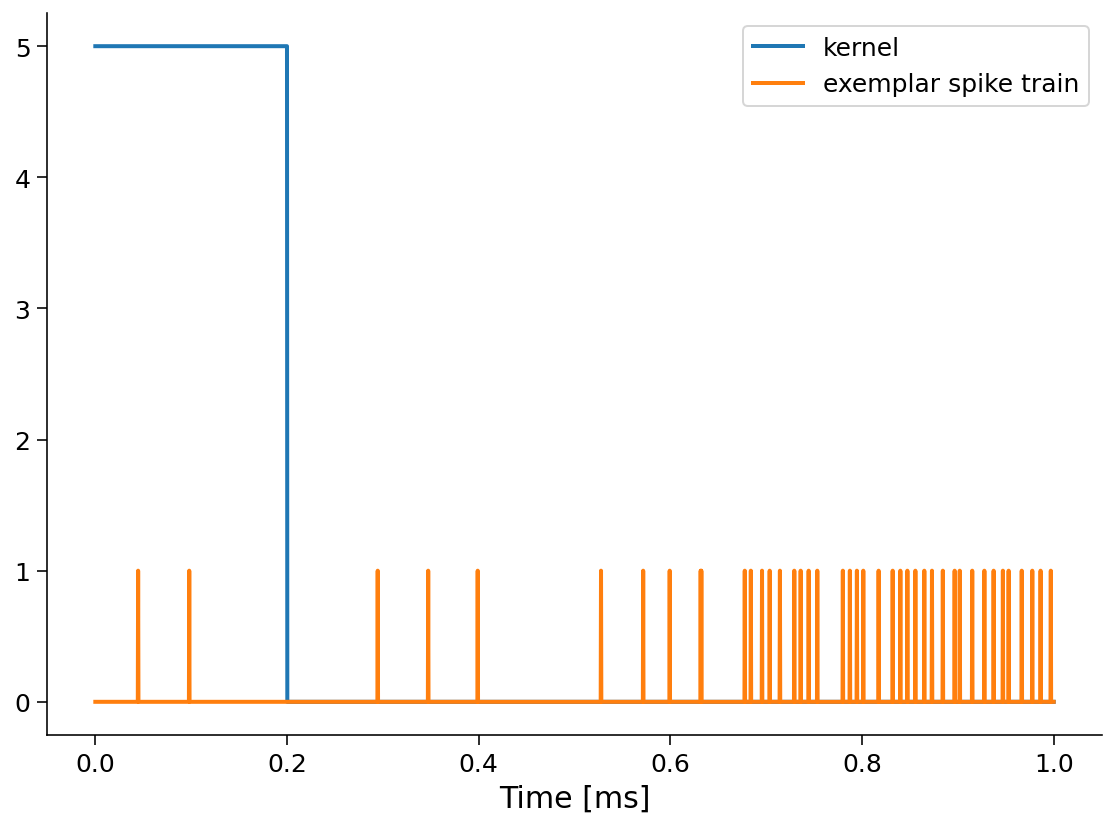

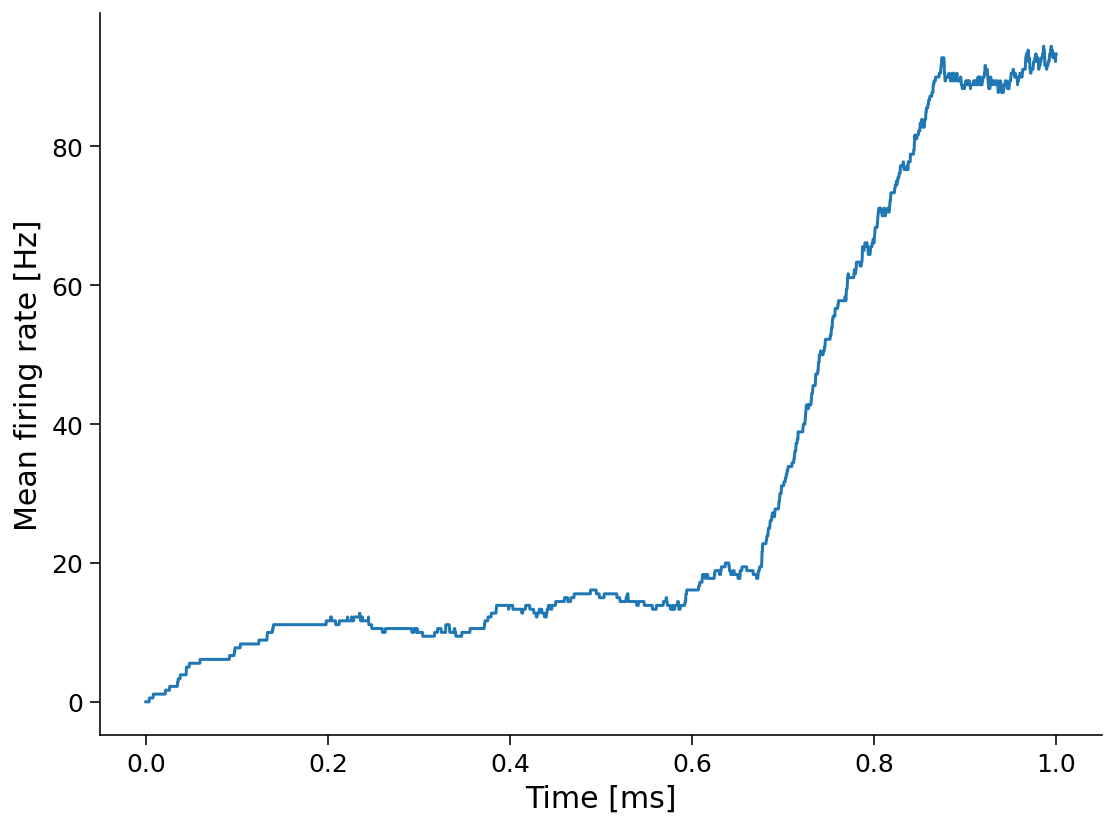

In [75]:
def firing_rate(S,kernel):
    """
    firing rate is a function that computes the firing rate from the spike trains and a given kernel

    Inputs : 
    -S (numpy array) is the spike train we want to compute the firing rate for
    -kernel (numpy array) is the kernel used for the convolution

    Outputs :
    -firing rate (numpy array) is the resulting firing rate 
    """

    firing_Rate = np.convolve(S,kernel, mode='full')
    firing_rate = firing_Rate[:len(S)]
    return firing_rate

def rect_kernel(time_vector,width):
    """
    rect_kernel creates the rectangular kernel used to compute the firing rate

    Inputs : 
    -time_vector is the time span on which we want to define this kernel
    -width is the width of the rectangular kernel (in the same units as time_vector)

    Outputs :
    -kernel is the returned rectangular kernel
    """

    kernel = (np.heaviside(time_vector,1) - np.heaviside(time_vector-width,1))/width
    return kernel

# Run the lines below to test your code

# Data_loading
S, dt = load_dataset()
Firing_rate = np.zeros_like(S)

t_range = np.linspace(0,1,S.shape[1])
kernel = rect_kernel(t_range,200e-3)
for ii in range(Firing_rate.shape[0]):
  Firing_rate[ii,:] = firing_rate(S[ii,:],kernel)

mean_firing_rate = np.mean(Firing_rate,0)

fig, ax1 = plt.subplots()
ax1.plot(t_range,kernel,label="kernel",LineWidth=2)
ax1.plot(t_range,S[1,:],label="exemplar spike train",LineWidth=2)
ax1.set_xlabel('Time [ms]')
ax1.legend()

fig, ax = plt.subplots()
ax.plot(t_range,mean_firing_rate)
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Mean firing rate [Hz]")

In [82]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '450px'
@widgets.interact(
    width=widgets.FloatSlider(200, min=10, max=500, step=10, layout=my_layout)

)
S,_ = load_dataset()
t_range = np.arange(0,1,S.shape[1])
def firingRate(width = 200):
    kernel = rect_kernel(t_range,width/1000)
    Firing_rate = np.zeros_like(S)
    for ii in range(Firing_rate.shape[0]):
      Firing_rate[ii,:] = firing_rate(S[ii,:],kernel)
    fig, ax=plt.subplots()
    ax.plot(t_range,kernel)
    plt.show()

interactive(children=(FloatSlider(value=200.0, description='width', layout=Layout(width='450px'), max=500.0, m…

## Exercise 2b 

Compute the firing rate using a gaussian kernel defined by : 

$$
\begin{eqnarray}
\kappa(t) & =&  \dfrac{1}{\sigma\sqrt{2\pi}}\exp\left(-\dfrac{\left(t-t_f\right)^2}{2\sigma^2}\right)
\end{eqnarray}
$$

where the width of the convolution kernel is defined by the parameter $\sigma$. 

Text(0, 0.5, 'Mean firing rate [Hz]')

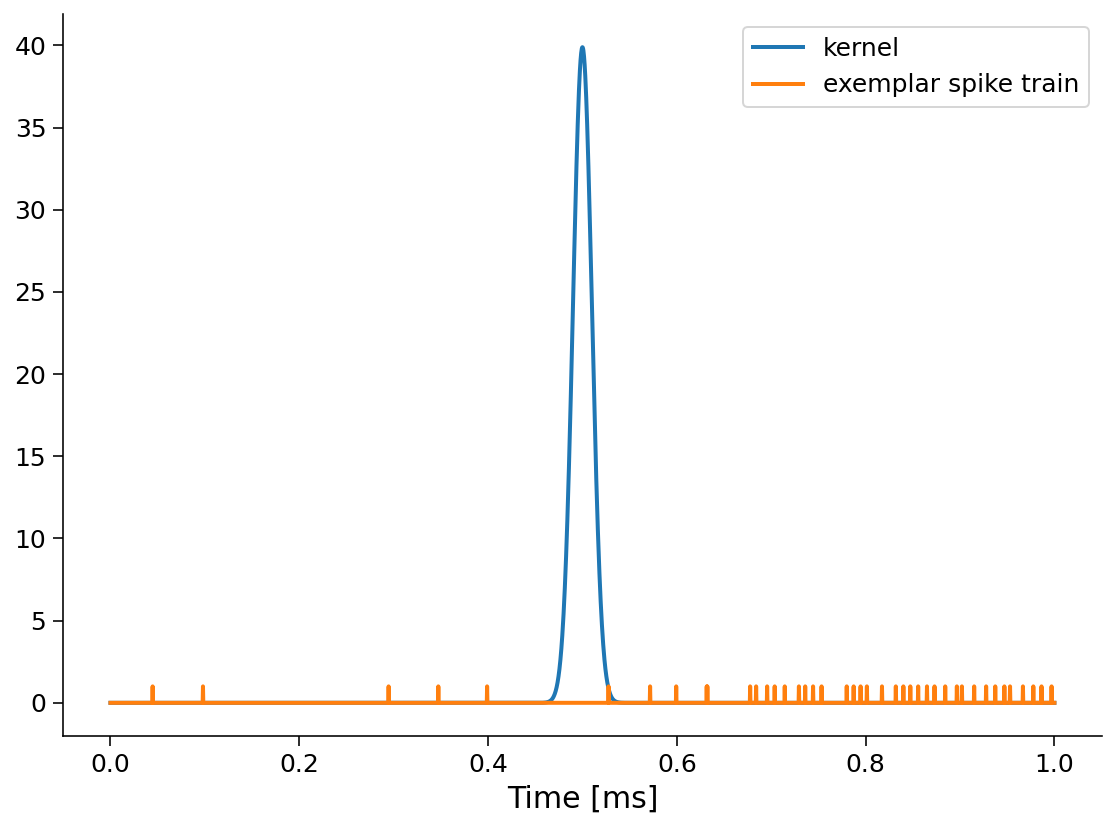

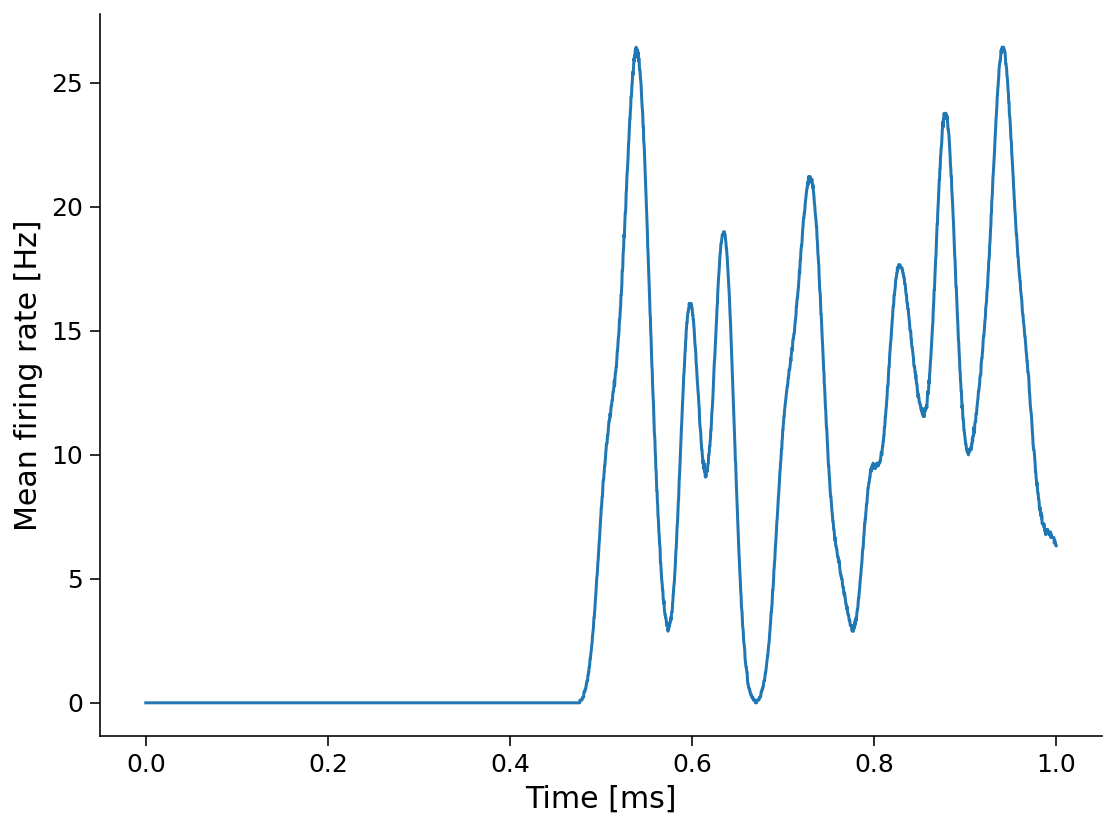

In [89]:
def gaussian_kernel(time_vector,sigma):
  """
  This function generates the gaussian kernel to compute the firing rate of a given spike trains

  Inputs : 
  -time_vector is the time span of the kernel
  -sigma is the width of the gaussian distribution

  Outputs:
  -kernel is the distribution
  """
  kernel = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(time_vector-time_vector[-1]/2)**2/(2*sigma**2))
  return kernel

#Run the lines below to test your code


S, dt = load_dataset()
Firing_rate = np.zeros_like(S)

t_range = np.linspace(0,1,S.shape[1])
kernel = gaussian_kernel(t_range,0.01)
for ii in range(Firing_rate.shape[0]):
  Firing_rate[ii,:] = firing_rate(S[ii,:],kernel)

mean_firing_rate = np.mean(Firing_rate,0)

fig, ax1 = plt.subplots()
ax1.plot(t_range,kernel,label="kernel",LineWidth=2)
ax1.plot(t_range,S[1,:],label="exemplar spike train",LineWidth=2)
ax1.set_xlabel('Time [ms]')
ax1.legend()

fig, ax = plt.subplots()
ax.plot(t_range,mean_firing_rate)
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Mean firing rate [Hz]")

**widget?**

---

## Exercise 3

In the first two exercises, we observed that the firing rate increased with the amplitude of the input current. In this exercise, we will investigate this phenomenon and determine whether this relationship is linear or not. 

Text(0, 0.5, 'Av firing rate')

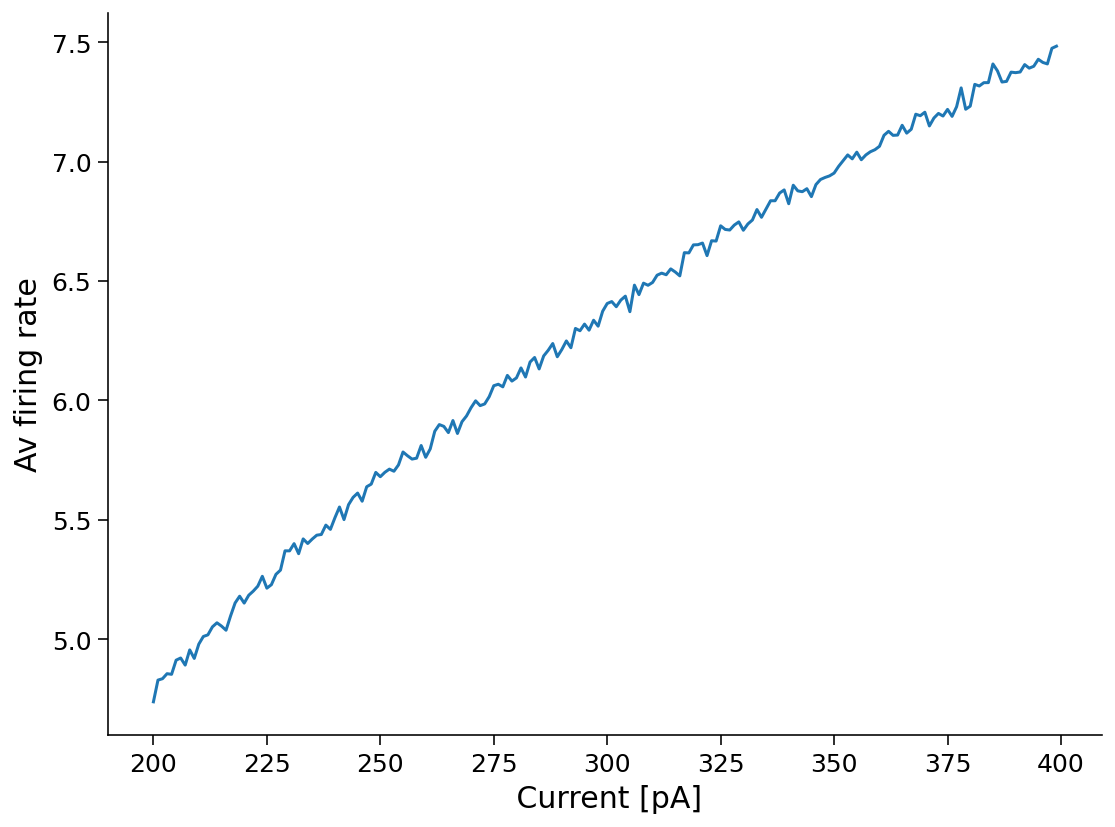

In [ ]:
""" 
Computes the firing rate of a neuron, needs in imput the spike train, and the kernel function. 
Output the firing rate."""
def firing_rate_rectKernel(S,dt = 1e-3, Dt = 0.2):
    if sum(S) == 0:
      return S
    else:

      k = np.zeros(len(S))
      k[1:int(Dt/dt)] = 1 #Kernel 
      # 4h, mon cerveau n'arrive plus à réfléchir --'
      res = np.convolve(S, k) #A peu près sure que c'est dans les paramètres à donner à convovle : 'same, 'valid
      return res[:len(S)]





t_max = 1000e-3   # second
dt = 1e-3        # second
t_range = np.arange(0,t_max,dt)
imax = 400
imin = 200
spike_av = np.zeros(imax-imin)
for i in range(imin,imax):
    nb_spike = np.zeros(20)
    for j in range(20):
      input_current = rand_syn(t_range, sigma =0.1, imean = i*1e-12)
      u,ts = LIF(input_current, t_range)

      #From time spike, generates a vector of 1 and zeros
      s_index = [int(tsi/dt) for tsi in ts]
      S = np.zeros_like(t_range)
      S[s_index] = 1

      #firing rate
      nb_spike[j] = np.mean(firing_rate_rectKernel(ts))

    spike_av[i-imin] = np.mean(nb_spike)
plt.plot(range(imin,imax),spike_av)
plt.xlabel(" Current [pA]")
plt.ylabel("Av firing rate")

---
# ISI intervals and coefficient of variation

Spike regularity can be quantified as the **coefficient of variation (CV) of the inter-spike-interval (ISI)**:
\begin{align}
\text{CV}_{\text{ISI}} = \frac{std(\text{ISI})}{mean(\text{ISI})}
\end{align}

The inter-spike-interval is simply the time between two spikes. 

A Poisson train is an example of high irregularity, in which $\textbf{CV}_{\textbf{ISI}} \textbf{= 1}$. And for a clocklike (regular) process we have $\textbf{CV}_{\textbf{ISI}} \textbf{= 0}$ because of **std(ISI)=0**.

## Exercice 8
Compute the inter-spike interval distribution as well as the coefficient of variation of signals provided in S to assess the stochasticity of neuron's activity. Plot the ISI distribution with an histogram to visualize the spike regularity of the neuron. 

Hint: look at the function hist of the matplotlib library

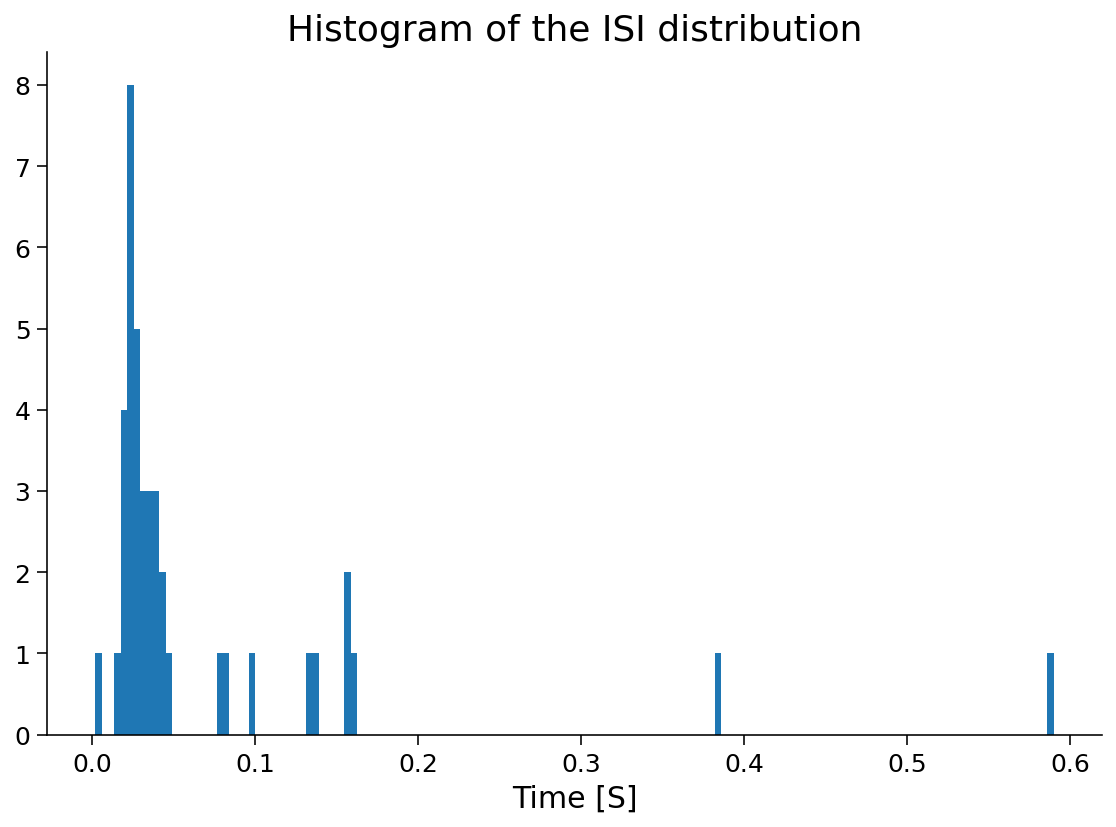

The coefficient of variaion of this neuron is 1.51851041702847


In [ ]:
S,dt = load_dataset()
"This function plots the ISI distribution of the neuron spike train and returns the coefficient of variation"
def plot_ISI(spikeTrain, dt):
    ISI = np.diff((np.where(spikeTrain))[0]*dt)
    plt.hist(ISI,150)
    plt.xlabel('Time [S]')
    plt.title("Histogram of the ISI distribution")
    plt.show()
    return (np.std(ISI)/np.mean(ISI))
CV = plot_ISI(S[1,:],dt)
print("The coefficient of variaion of this neuron is", CV)

In [ ]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '450px'
@widgets.interact(
    neuron=widgets.IntSlider(0, min=0, max=9, step=1, layout=my_layout)

)

def firingRate(neuron = 0):
        
    S,dt = load_dataset()
    CV=plot_ISI(S[neuron,:],dt)
    print("The CV for neuron", neuron, "is :", CV)

interactive(children=(IntSlider(value=0, description='neuron', layout=Layout(width='450px'), max=9), Output())…

---

The idea is to estimate the firing rate based on Bayesian statistics. Imagine that you count a number of spikes $k$ during one second. The PSTH is equal to the spike count, so simply $k$ spikes. Now we could use Poisson model if the coefficient of variation is close to one (we have discussed it in the course). The probability that the number of spikes equal $k$ given a rate of $\rho$ is:
\begin{eqnarray*}
P(N = k | \rho) = \frac{e^{-\rho}\rho^k}{k!},
\end{eqnarray*}
to which we can apply Bayes' theorem to estimate $\rho$:
\begin{eqnarray*}
P(\rho| N = k ) &\propto& P(N = k | \rho) P(\rho),\\
P(\rho| N = k ) &\propto& \frac{e^{-\rho}\rho^k}{k!} P(\rho),
\end{eqnarray*}
where $P(\rho)$ expresses the prior. If we do not have any prior assumption we can use a flat, non-informative prior. Thus the posterior distribution can be approximated numerically by evaluating $P(N=k|\rho)$ for different vaules of $\rho$ and dividing by the sum so that it integrates to 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data: k = number of spikes
k = 10
n = 4000        # length of vectors
deltaT = 1      # Taking time interval into account
dx = .01        # delta x

rho = np.arange(0,n*dx,dx)

posterior = np.exp(-rho*deltaT)* (rho*deltaT)**k /np.math.factorial(k) #Don't need a loop for this, and np.power can be replaced by **
posterior = posterior/np.sum(posterior)
expectedValue = posterior@rho


plt.plot(rho,posterior, label='Posterior')   
plt.axvline(rho[int(expectedValue/dx)],color='k',ls='--',lw=0.5 ,label='Expected')
plt.xlabel('rho')
plt.ylabel('P(rho)')
plt.legend()
print(expectedValue)  



A bonus could be to consider that the time interval is differnet from one second. Say 2 sec, then if you have k spikes, the PSTH converted to hertz suggest that the firing rate is k/2. Using the Poisson model, we must take Δt into account in the integral (slide 45 in the course).
